**Problem Definition**

Convert the Sign Alphabet to Text

**Data**

[Dataset](https://www.kaggle.com/datasets/datamunge/sign-language-mnist)

1. No cases for the letters J & Z (Reason: J & Z require motion)
2. GrayScale Images
3. Pixel Values Range From 0 to 255
4. Each image contains 784 Pixels


**Evaluation**

Accuracy

**Modelling**

CNN

# Initial End-to-End Workflow (Start)

In [2]:
pip install tensorflow

  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 22.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 35.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 34.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 34.1 MB/s eta 0:00:00
Using cached wheel-0.45.1-py3-none-any.whl (72 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.0
    Uninstalling numpy-2.2.0:
      Successfully uninstalled numpy-2.2.0
Note: y

In [3]:
# Importing required libraries

from sklearn.preprocessing import LabelBinarizer
from tensorflow import keras
from keras.utils import plot_model

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

2025-01-13 19:08:36.085312: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-13 19:08:36.088961: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-13 19:08:36.098268: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736795316.112463    2017 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736795316.116704    2017 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-13 19:08:36.134139: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [4]:
# loading the training data (X+y)
train_df = pd.read_csv('data/alphabet/sign_mnist_train.csv')

In [5]:
train_df = train_df.sample(frac=1, random_state=42) # Shuffiling the entire dataset

In [6]:
X, y = train_df.drop('label', axis=1), train_df['label'] # Split the dataset into X, y

In [7]:
X.shape, y.shape

((27455, 784), (27455,))

In [8]:
np.unique(X.dtypes), y.dtype

(array([dtype('int64')], dtype=object), dtype('int64'))

In [9]:
label_binarizer = LabelBinarizer() # Binarize labels in a one-vs-all fashion (return one-hot encoded vectors)
y = label_binarizer.fit_transform(y)

In [10]:
X = X/255.0 # Normalizing the training data and converting the data type to float

In [11]:
np.unique(X.dtypes)

array([dtype('float64')], dtype=object)

In [12]:
# Converting the 1-D array of 784 pixels to (28, 28, 1) Image
# (28, 28) represents the spatial dimensions of the image & 1 specifies that the image is grayscale
X = tf.reshape(X, [-1, 28, 28, 1])

2025-01-13 19:08:57.473497: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-01-13 19:08:57.537477: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172197760 exceeds 10% of free system memory.


In [13]:
X.shape, y.shape

(TensorShape([27455, 28, 28, 1]), (27455, 24))

In [14]:
# Generating a validation set

X_train, X_valid = X[:25000], X[25000:]
y_train, y_valid = y[:25000], y[25000:]

In [15]:
X_train[0].dtype

tf.float64

In [16]:
X_train[0].shape

TensorShape([28, 28, 1])

(<matplotlib.image.AxesImage at 0x7e4790bce510>,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1]))

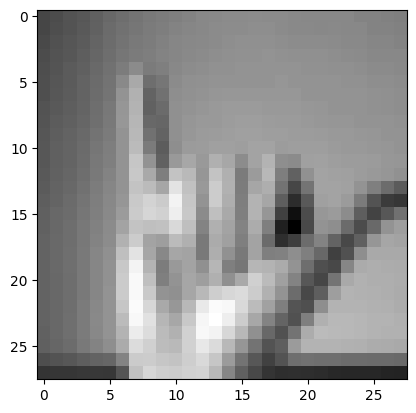

In [17]:
plt.imshow(X[0], cmap='gray'), y[0]

In [18]:
# Defining the CNN

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(24, activation='softmax'))

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,704 (1.56 MB)

 Trainable params: 407,704 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# save_best_cb = keras.callbacks.ModelCheckpoint('models/initial-end-to-end', save_best_only=True) # Saves the best model so far
save_best_cb = keras.callbacks.ModelCheckpoint('models/initial-end-to-end.keras', save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5) # Interupts training when there is no progress

In [24]:
# The model is same is 'models/initial-end-to-end'
# The history object is 'models/initial-end-to-end-history'

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])

Epoch 1/20


2025-01-13 19:11:42.154168: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 78400000 exceeds 10% of free system memory.


782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.4570 - loss: 1.7787 - val_accuracy: 0.9927 - val_loss: 0.0332
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.9952 - loss: 0.0214 - val_accuracy: 0.9996 - val_loss: 0.0060
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 2.2503e-04
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 1.0000 - loss: 1.7516e-04 - val_accuracy: 1.0000 - val_loss: 1.0494e-04
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 1.0000 - loss: 8.8478e-05 - val_accuracy: 1.0000 - val_loss: 6.2237e-05
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 1.0000 - loss: 4.8370e-05 - val_accuracy: 1.0000 - val_loss: 3.7158e-05
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 1.0000 - loss: 3.1208e-05 - val_accuracy: 1.0000 - val_loss: 2.3332e-05
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy:

In [25]:
history.history # Contains the training related information for each epoch

{'accuracy': [0.7414000034332275,
  0.9934800267219543,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.8330546617507935,
  0.02612423524260521,
  0.0007260236889123917,
  0.00014736676530446857,
  7.815320714144036e-05,
  4.504321623244323e-05,
  2.8184111215523444e-05,
  1.7918382582138292e-05,
  1.163912020274438e-05,
  7.621340046171099e-06,
  4.970009740645764e-06,
  3.230861693737097e-06,
  2.1112903141329298e-06,
  1.3888211469748057e-06,
  9.054148222276126e-07,
  6.158776386655518e-07,
  3.8768629906371643e-07,
  2.5743418063939316e-07,
  1.5917758844352647e-07,
  1.0861387522709265e-07],
 'val_accuracy': [0.9926680326461792,
  0.999592661857605,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.03317105770111084,
  0.005996118765324354,
  0.00022503393120132387,
  0.00010493955051060766,
  6.223

In [29]:
# Saving the history object

with open('models/intial-end-to-end-history', 'wb') as history_file:
    pickle.dump(history.history, history_file)

In [30]:
h = np.load('models/intial-end-to-end-history', allow_pickle=True)
h

{'accuracy': [0.7414000034332275,
  0.9934800267219543,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.8330546617507935,
  0.02612423524260521,
  0.0007260236889123917,
  0.00014736676530446857,
  7.815320714144036e-05,
  4.504321623244323e-05,
  2.8184111215523444e-05,
  1.7918382582138292e-05,
  1.163912020274438e-05,
  7.621340046171099e-06,
  4.970009740645764e-06,
  3.230861693737097e-06,
  2.1112903141329298e-06,
  1.3888211469748057e-06,
  9.054148222276126e-07,
  6.158776386655518e-07,
  3.8768629906371643e-07,
  2.5743418063939316e-07,
  1.5917758844352647e-07,
  1.0861387522709265e-07],
 'val_accuracy': [0.9926680326461792,
  0.999592661857605,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.03317105770111084,
  0.005996118765324354,
  0.00022503393120132387,
  0.00010493955051060766,
  6.223

In [32]:
best_model = keras.models.load_model('models/initial-end-to-end.keras') # Model with best set of parameters not necessarily the model at the last epoch of training

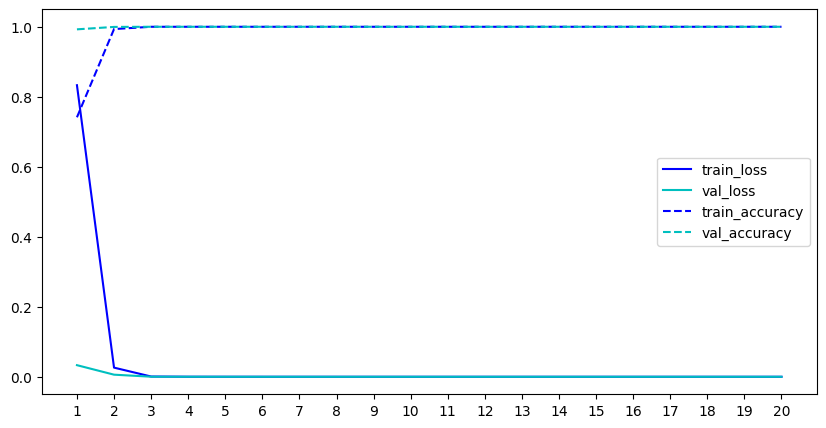

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))
n_epochs = len(h['loss'])
ax.plot(range(1, n_epochs+1), h['loss'], color='b', label='train_loss')
ax.plot(range(1, n_epochs+1), h['val_loss'], color='c', label='val_loss')
ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='c', label='val_accuracy', linestyle='--')
ax.set_xticks(range(1, n_epochs+1))
ax.legend()

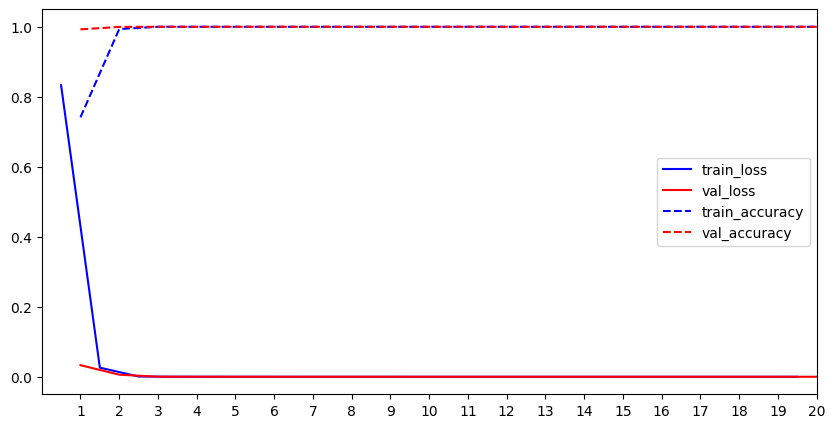

In [34]:
# Training Loss Correction

fig, ax = plt.subplots(figsize=(10, 5))
n_epochs = len(h['loss'])

# Shift training loss by 0.5 as training loss is measured during the epoch and validation loss is measured after the epoch

x_loss = np.arange(n_epochs+1)-0.5
ax.plot(x_loss[x_loss >= 0], h['loss'], color='b', label='train_loss')
ax.plot(range(1, n_epochs+1), h['val_loss'], color='r', label='val_loss')
ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='r', label='val_accuracy', linestyle='--')
ax.set_xlim(0, n_epochs)
ax.set_xticks(range(1, n_epochs+1))
ax.legend()

In [35]:
# Defining a function the get the training and validation plots representing the accuracy and loss at each epoch

def get_train_val_plots(h, yticks=None, figsize=(10, 5)):
    # h: Any dictionary like the history.history
    
    fig, ax = plt.subplots(figsize=figsize)
    n_epochs = len(h['loss'])
    x_loss = np.arange(n_epochs+1)-0.5
    
    ax.plot(x_loss[x_loss >= 0], h['loss'], color='b', label='train_loss')
    ax.plot(range(1, n_epochs+1), h['val_loss'], color='r', label='val_loss')
    ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
    ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='r', label='val_accuracy', linestyle='--')
    ax.set_xlim(0, n_epochs)
    ax.set_xticks(range(1, n_epochs+1))
    if yticks is not None:
        ax.set_yticks(yticks)
    ax.legend()

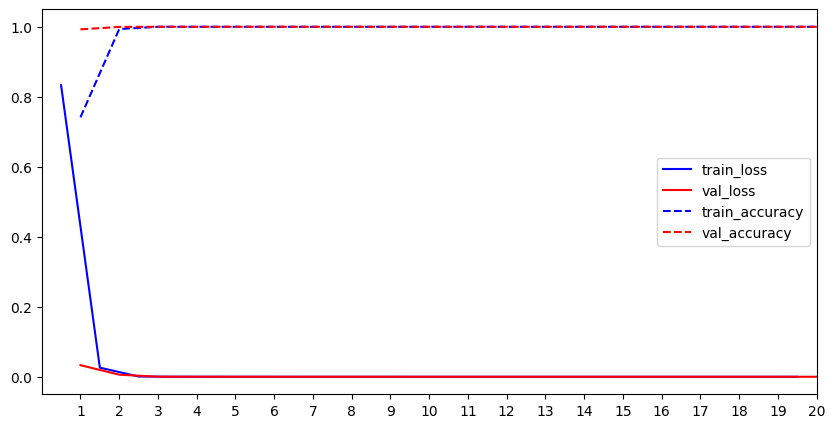

In [36]:
get_train_val_plots(h)

In [37]:
test_df = pd.read_csv('data/alphabet/sign_mnist_test.csv') # Load the test data

In [38]:
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [39]:
X_test = tf.reshape(X_test, [-1, 28, 28, 1])

2025-01-13 19:24:27.751244: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 44982784 exceeds 10% of free system memory.


In [40]:
y_test = label_binarizer.transform(y_test)

In [41]:
best_model.evaluate(X_test, y_test)

225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9248 - loss: 127.8568


[132.03073120117188, 0.9273563623428345]

Accuracy: 94%

In [42]:
# Preprocesses the input and evaluates the model
def evaluate_model(model, X_test, y_test, label_binarizer):
    X_test_reshape = tf.reshape(X_test, [-1, 28, 28, 1])
    y_test_labels = label_binarizer.transform(y_test)
    results = model.evaluate(X_test_reshape, y_test_labels)
    print(f'Loss: {results[0]:.3f} Accuracy: {results[1]:.3f}')

In [43]:
results = evaluate_model(best_model, test_df.drop('label', axis=1), test_df['label'], label_binarizer)

 11/225 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9112 - loss: 109.5127

2025-01-13 19:24:48.763002: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 44982784 exceeds 10% of free system memory.


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9248 - loss: 127.8568
Loss: 132.031 Accuracy: 0.927


## Converting Images to a Sentence

In [44]:
test_df = pd.read_csv('data/alphabet/sign_mnist_test.csv') # Load the test data

In [45]:
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [46]:
X_test = tf.reshape(X_test, [-1, 28, 28, 1])

2025-01-13 19:24:55.048753: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 44982784 exceeds 10% of free system memory.


In [47]:
d = {chr(ord('a') + i):i for i in range(26)}
d_rev = {i:chr(ord('a') + i) for i in range(26)}
d[' '] = d_rev[' '] = ' '

In [71]:
sentence = 'classic'

for i in sentence:
    print(d[i], end=' ')

2 11 0 18 18 8 2 

In [72]:
best_model.predict(tf.reshape(X_test[0], [-1, 28, 28, 1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [73]:
images_taken = []
result = ''

for i in sentence:
    if i != ' ':
        char_index = np.random.choice(y_test[y_test==ord(i)-ord('a')].index)
        images_taken.append(char_index)
        y_pred = best_model.predict(tf.reshape(X_test[char_index], [-1, 28, 28, 1]))
        result += d_rev[label_binarizer.inverse_transform(y_pred)[0]]
    else:
        result += ' '
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
classic


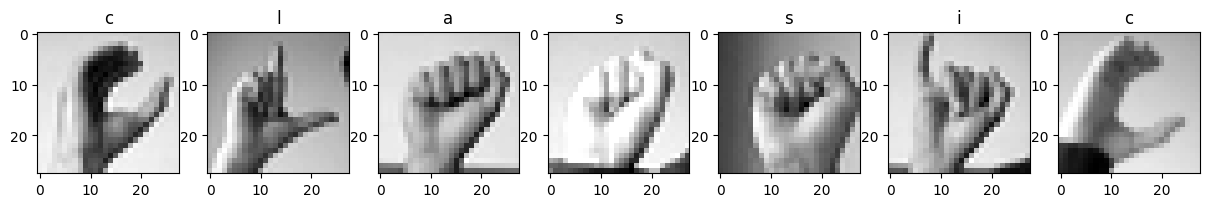

In [74]:
# Visualizing the test images
images_taken_dup = list(reversed(images_taken))
for word in sentence.split():
    fig, ax = plt.subplots(1, len(word), figsize=(15, 15))
    for i in range(len(word)):
        ax[i].imshow(X_test[images_taken_dup.pop()], cmap='gray')
        ax[i].set_title(word[i])

In [75]:
def test_on_sentence(model, sentence, X_test, y_test, label_binarizer, figsize=(20, 20)):
    # Random images are taken from X_test along with the corresponding labels in y_test
    # based on the letters in the sentence.
    # These images are fed to the model and its output is printed
    
    sentence = sentence.lower()
    
    d = {chr(ord('a') + i):i for i in range(26)}
    d_rev = {i:chr(ord('a') + i) for i in range(26)}
    d[' '] = d_rev[' '] = ' '
    
    
    images_taken = []
    result = ''
    
    X_test_reshape = tf.reshape(X_test, [-1, 28, 28, 1])
    

    for i in sentence:
        if i != ' ':
            char_index = np.random.choice(y_test[y_test==ord(i)-ord('a')].index)
            images_taken.append(char_index)
            y_pred = model.predict(tf.reshape(X_test_reshape[char_index], [1, 28, 28, 1]))
            result += d_rev[label_binarizer.inverse_transform(y_pred)[0]]
        else:
            result += ' '
            
    print(f'The actual sentence is "{sentence}"')
    print(f'The predicted sentence is "{result}"')
        
    images_taken.reverse()
    for word in sentence.split():
        fig, ax = plt.subplots(1, len(word), figsize=figsize)
        for i in range(len(word)):
            ax[i].imshow(X_test_reshape[images_taken.pop()], cmap='gray')
            ax[i].set_title(word[i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The actual sentence is "classic"
The predicted sentence is "classic"


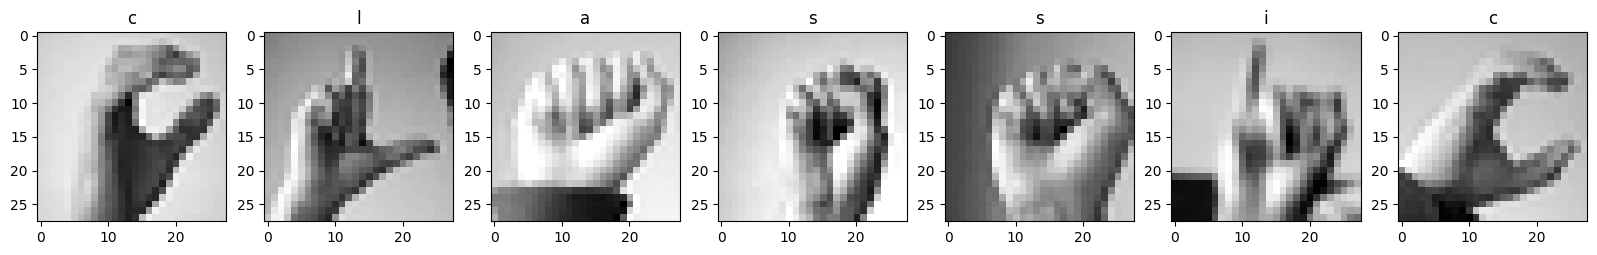

In [78]:
test_on_sentence(best_model, 'classic', test_df.drop('label', axis=1), test_df['label'], label_binarizer)